#  Obesity and Exercise

I have often thought that as long as I work out consistantly, I can eat whatever I wanted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
us_health = pd.read_csv('US_Health.csv')

In [3]:
state_names = us_health['LocationDesc'].unique()
health_df = pd.DataFrame(index = state_names)

In [4]:
column_titles = ['% Obese', '% Over Weight', '%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_df(cat_type_1, cat_1):
    temp_df = pd.DataFrame(index = state_names)
    for c, ind in enumerate(us_health['Question'].unique()):
        temp_value = us_health[(us_health['StratificationCategory1']== cat_type_1) 
                               & (us_health['Stratification1']== cat_1)
                               &(us_health['Question']== ind)
                               &(us_health['YearStart']== 2015)][['Data_Value']]
        temp_df[column_titles[c]] = np.array(temp_value['Data_Value'])
    temp_df = temp_df.drop(['National'])
    temp_df['%_Eats_Fruit'] = 100 - temp_df['%_Eats_Fruit']
    temp_df['%_Eats_Veg'] = 100 - temp_df['%_Eats_Veg']
    temp_df['%_Active'] = 100 - temp_df['%_Active']
    temp_df['%_O_And_O'] = temp_df['% Obese'] + temp_df['% Over Weight']
    return temp_df

In [5]:
male_df = create_df('Gender','Male')

In [6]:
male_df.head()

,% Obese,% Over Weight,%_Eats_Fruit,%_Eats_Veg,%_Lift,%_Min_Cardio,%_Lift_Cardio,%_Max_Cardio,%_Active,%_O_And_O
Alabama,29.8,42.5,53.6,70.4,30.2,46.8,19.4,28.8,70.1,72.3
Alaska,29.3,42.8,53.8,76.7,34.9,53.7,23.4,34.5,75.9,72.1
Arizona,29.6,41.5,45.2,68.4,30.0,49.1,18.7,30.5,69.7,71.1
Arkansas,35.1,38.0,57.7,77.4,37.8,56.6,25.9,36.0,80.4,73.1
California,24.6,41.8,59.3,79.3,38.1,60.0,26.8,39.1,82.3,66.4


In [7]:
plot_y = ['%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_plots(data_frame, weight_class):
    fig = plt.figure(figsize= (16,16))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.regplot(x=data_frame[weight_class] , y=data_frame[col])
    plt.show()

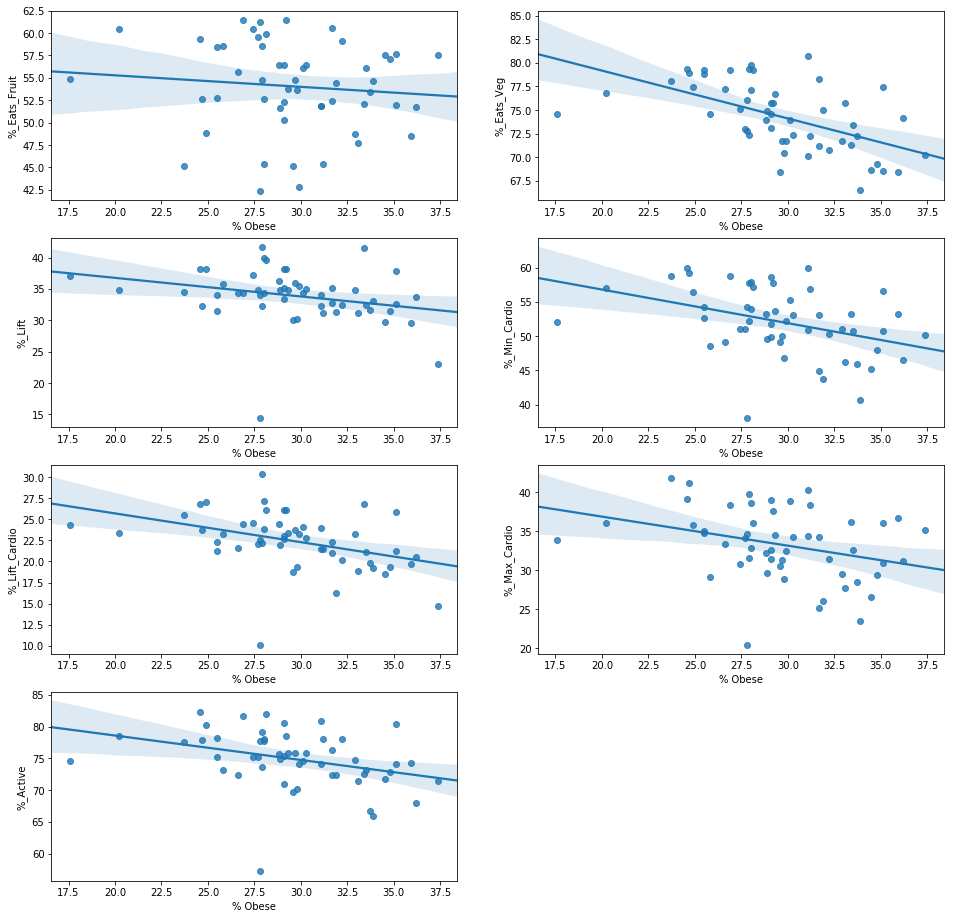

In [8]:
create_plots(male_df,'% Obese')

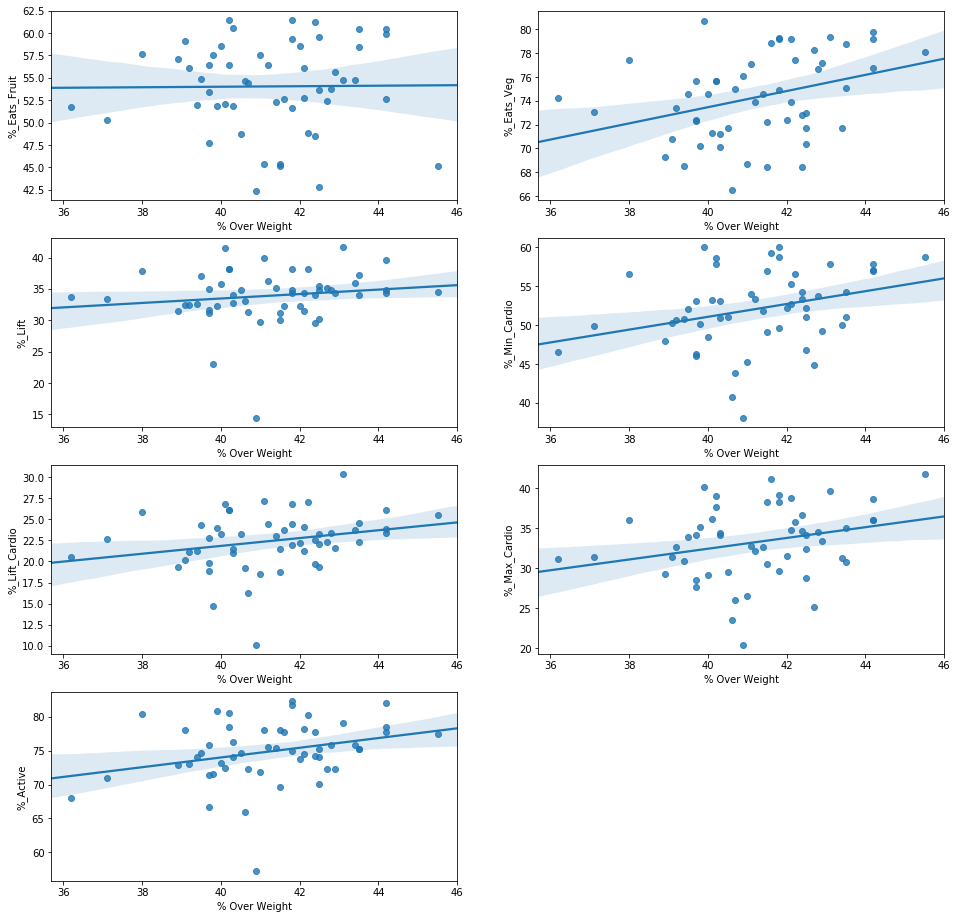

In [9]:
create_plots(male_df,'% Over Weight')

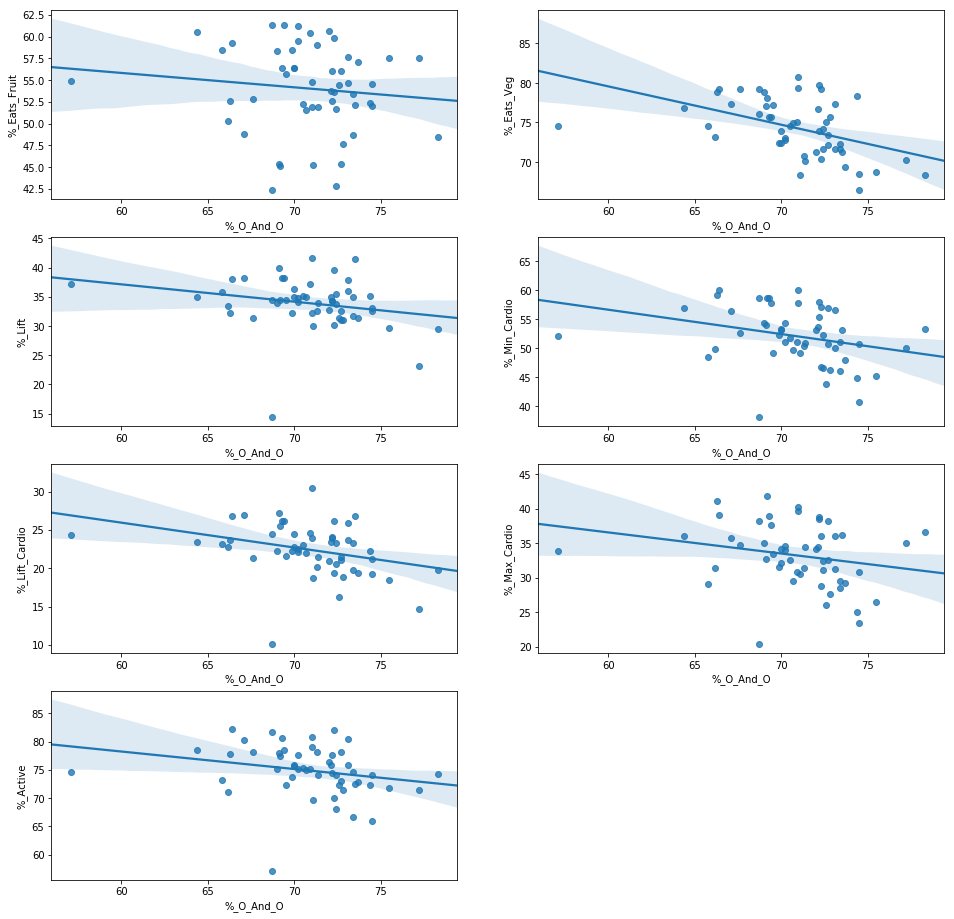

In [10]:
create_plots(male_df, '%_O_And_O')

In [11]:
female_df = create_df('Gender','Female')

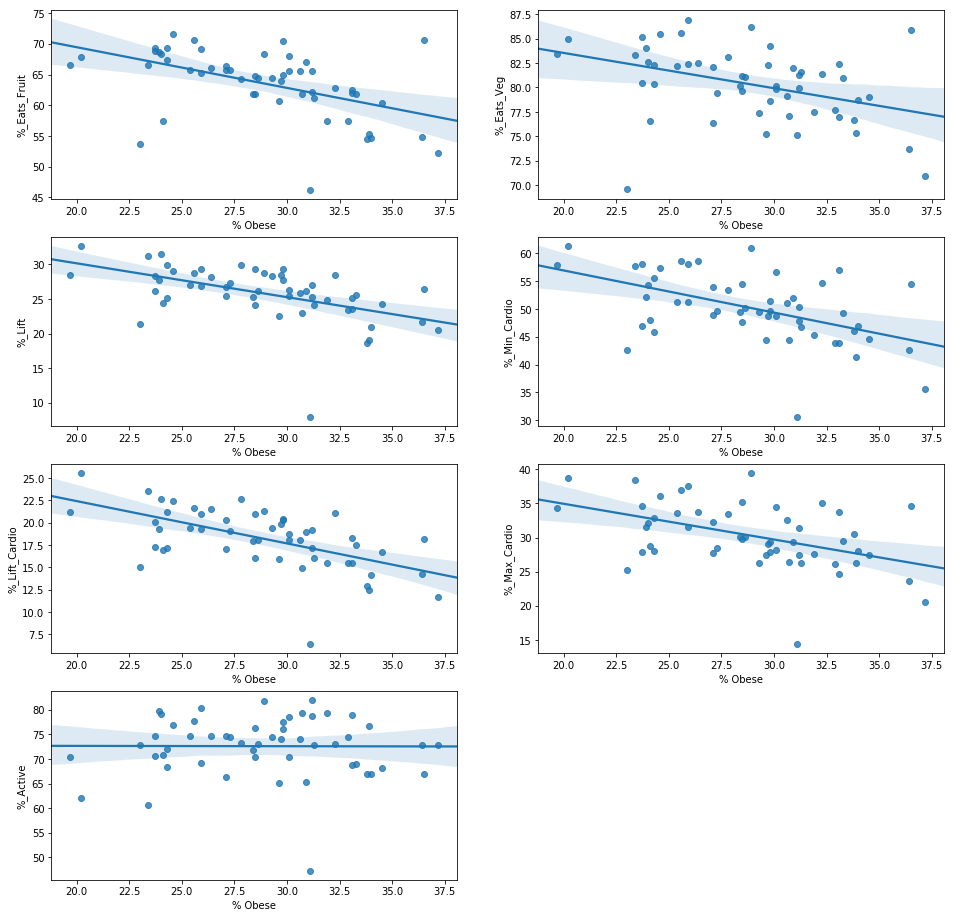

In [12]:
create_plots(female_df,'% Obese')

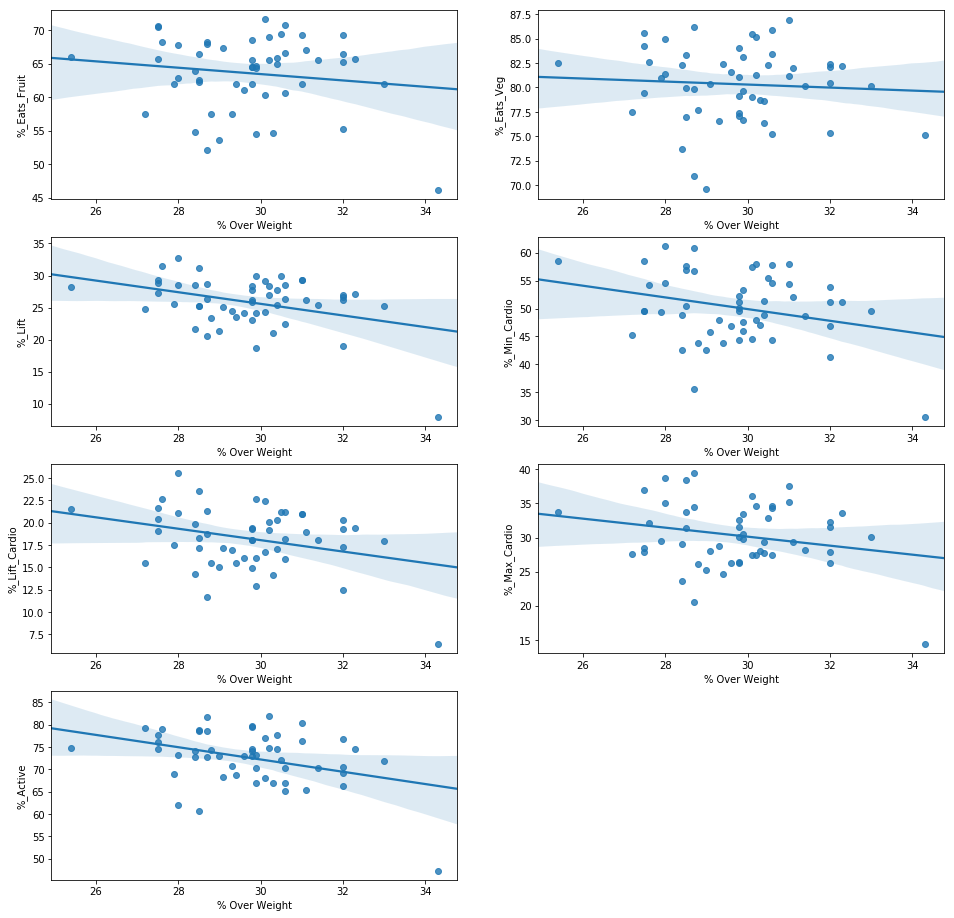

In [13]:
create_plots(female_df,'% Over Weight')

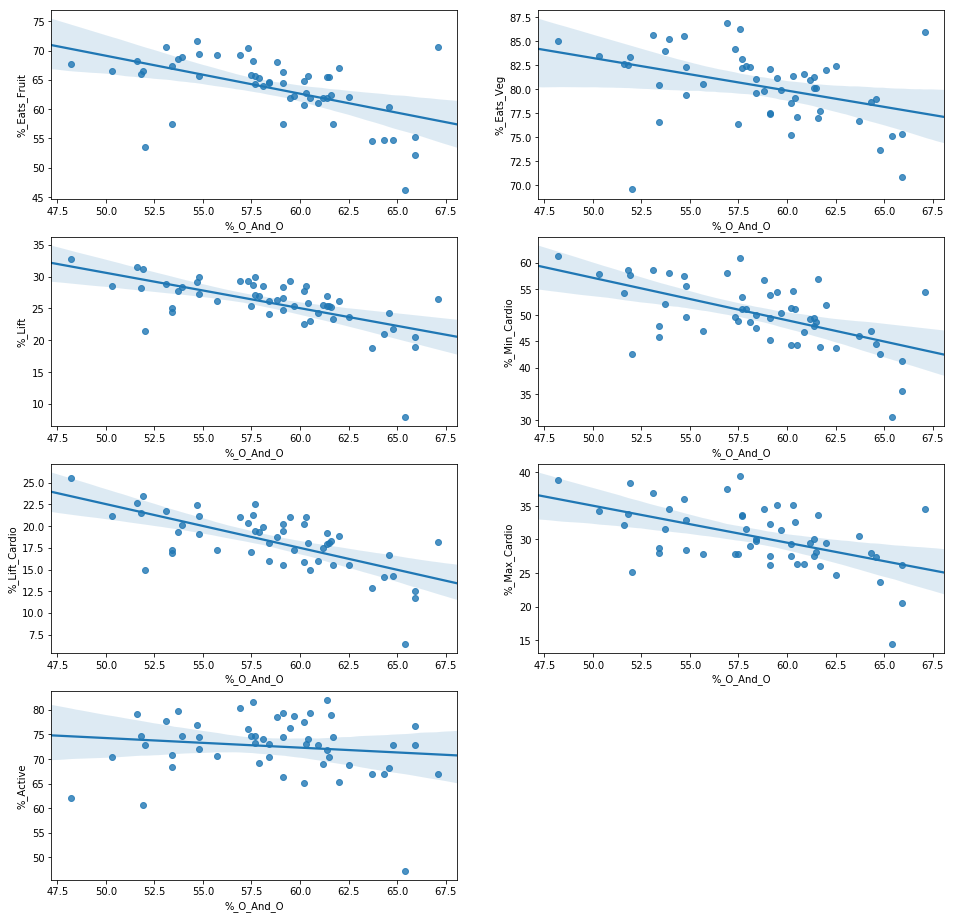

In [14]:
create_plots(female_df,'%_O_And_O')

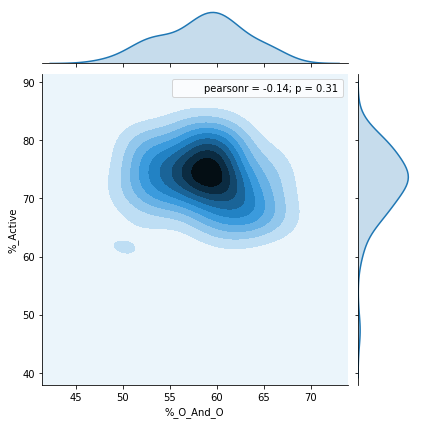

In [18]:
sns.jointplot(female_df['%_O_And_O'],female_df['%_Active'], kind="kde")
plt.show()

In [28]:
def create_jointplots(data_frame, weight_class):
    fig = plt.figure(figsize= (20,20))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.kdeplot(data_frame[weight_class],data_frame[col], shade = True)
    plt.show()

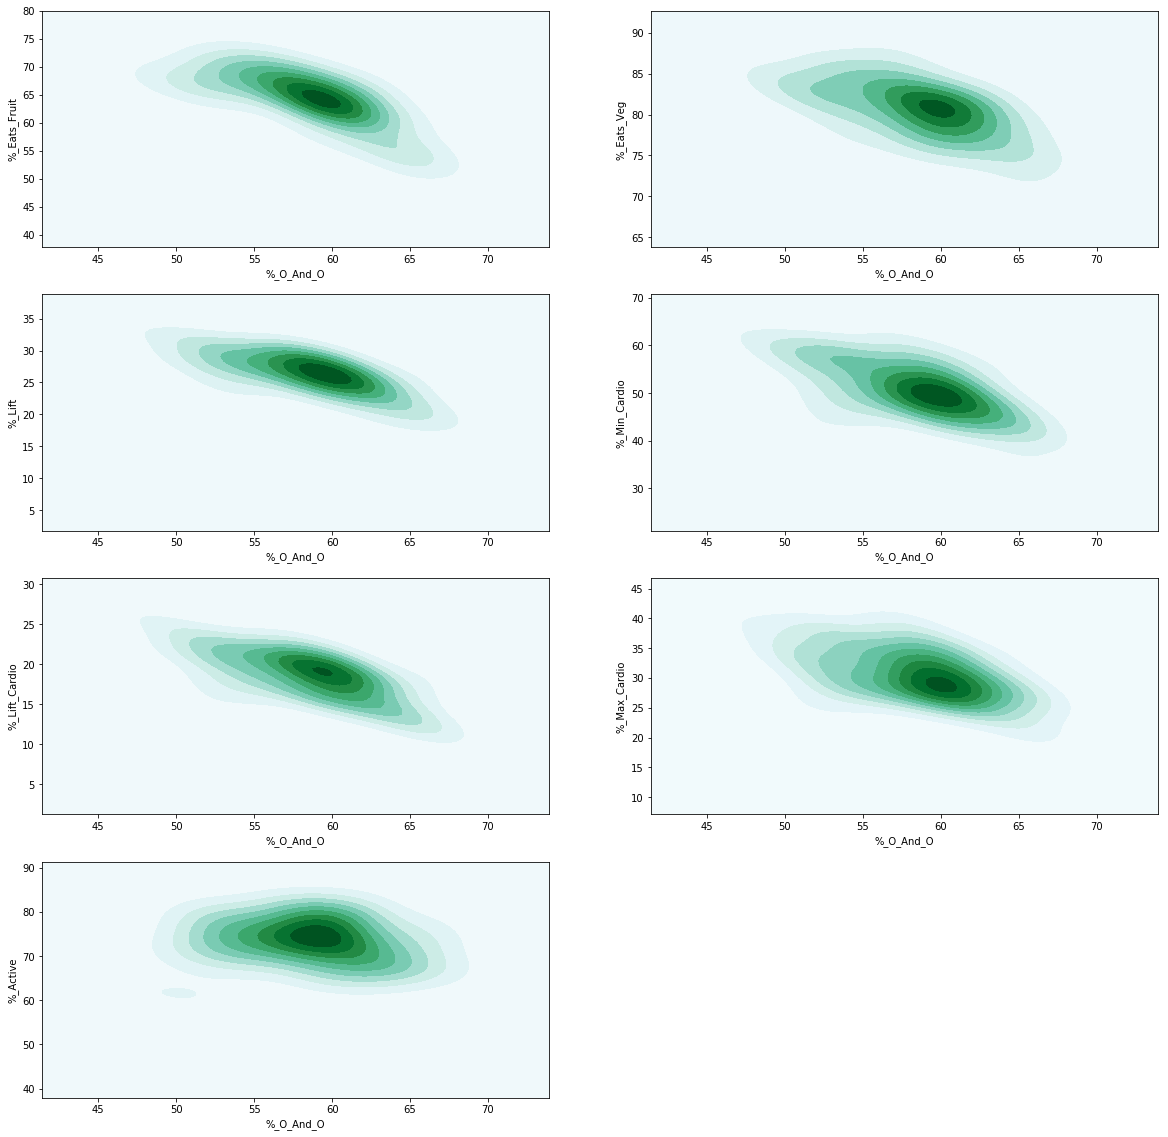

In [29]:
create_jointplots(female_df,'%_O_And_O')

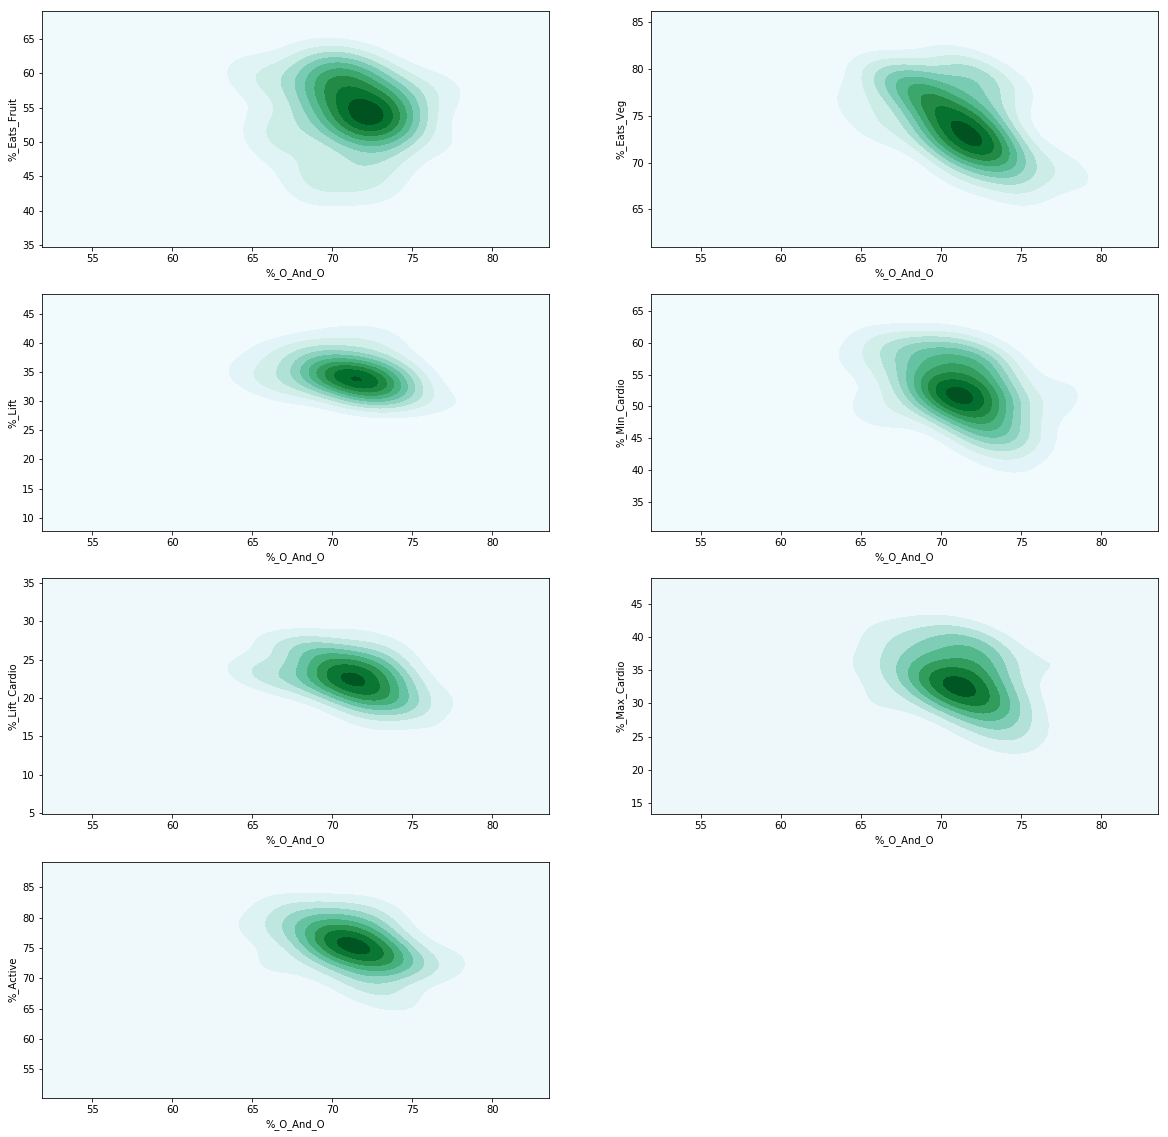

In [30]:
create_jointplots(male_df,'%_O_And_O')

In [33]:
def create_national_df(cat_type_1, cat_1):
    temp_df = pd.DataFrame(index = state_names)
    for c, ind in enumerate(us_health['Question'].unique()):
        temp_value = us_health[(us_health['StratificationCategory1']== cat_type_1) 
                               & (us_health['Stratification1']== cat_1)
                               &(us_health['Question']== ind)
                               &(us_health['YearStart']== 2015)][['Data_Value']]
        temp_df[column_titles[c]] = np.array(temp_value['Data_Value'])
    temp_df['%_Eats_Fruit'] = 100 - temp_df['%_Eats_Fruit']
    temp_df['%_Eats_Veg'] = 100 - temp_df['%_Eats_Veg']
    temp_df['%_Active'] = 100 - temp_df['%_Active']
    temp_df['%_O_And_O'] = temp_df['% Obese'] + temp_df['% Over Weight']
    return temp_df

In [35]:
national_male = create_national_df('Gender','Male')

In [42]:
national_male = national_male.loc['National':'National']

In [43]:
national_male

,% Obese,% Over Weight,%_Eats_Fruit,%_Eats_Veg,%_Lift,%_Min_Cardio,%_Lift_Cardio,%_Max_Cardio,%_Active,%_O_And_O
National,34.9,37.8,48.3,77.0,38.1,58.1,26.9,38.2,79.2,72.7
